# <center>HW01 </center>
### Author:
Issac Sepulveda - A01783245
### Date:
13 de Mayo 2025

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import statsmodels.api as sm
from scipy.stats import skew, kurtosis

# Set the style for seaborn
sns.set(style = "whitegrid")

In [2]:
# Load the data from the Excel file
file_path = 'S02_DataStud.xlsx'
data = pd.read_excel(file_path)

# Display the dataframe
data.round(2)

,Matricula,Gender,Final Grade,Participacion,Kahoot,Homework,Evidence,Final Exam,Section
0,A00571984,Female,19.29,60.50,30.58,22.50,0,0.0,201
1,A01784463,Male,96.10,73.75,98.59,95.00,94,108.0,201
2,A01275304,Male,19.68,58.94,30.58,25.00,0,0.0,201
3,A01784307,Male,89.43,74.69,95.01,97.50,94,85.0,201
4,A01661905,Male,72.23,71.44,57.41,82.00,94,61.0,201
...,...,...,...,...,...,...,...,...,...
56,A01784574,Female,81.59,72.57,86.28,91.25,75,79.0,202
57,A01784046,Female,89.80,81.37,90.25,91.25,75,100.0,202
58,A01784111,Female,91.36,79.17,87.70,88.93,94,100.0,202
59,A01746739,Male,56.46,66.93,27.86,91.43,0,64.6,202


In [3]:
from scipy.stats import skew, kurtosis

# Seleccionamos las columnas numéricas que te interesan
cols = ['Final Grade', 'Participacion', 'Kahoot', 'Homework', 'Evidence', 'Final Exam']

# Creamos el DataFrame resumen
summary = pd.DataFrame(index=['Media', 'Desviación estándar', 'Asimetría', 'Curtosis', 'Q1', 'Q2 (Mediana)', 'Q3'])

for col in cols:
    summary[col] = [
        data[col].mean(),
        data[col].std(),
        skew(data[col], bias=False),
        kurtosis(data[col], bias=False),
        data[col].quantile(0.25),
        data[col].median(),
        data[col].quantile(0.75)
    ]

print("Resumen estadístico completo:")
print(summary)

Resumen estadístico completo:
                     Final Grade  Participacion     Kahoot   Homework  \
Media                  81.358111      74.132925  80.949018  85.778689   
Desviación estándar    17.271805       6.583450  20.503669  18.484845   
Asimetría              -2.660710      -0.126553  -1.553525  -3.195914   
Curtosis                7.751825       0.092477   1.556677  10.644410   
Q1                     79.331973      70.937501  75.088479  86.250000   
Q2 (Mediana)           85.311488      73.562500  87.563901  91.250000   
Q3                     91.207010      79.062501  95.900511  95.000000   

                      Evidence  Final Exam  
Media                81.934426   81.203279  
Desviación estándar  26.157133   23.989963  
Asimetría            -2.594098   -1.932129  
Curtosis              5.780829    4.634576  
Q1                   82.000000   74.800000  
Q2 (Mediana)         94.000000   85.400000  
Q3                   94.000000   95.800000  


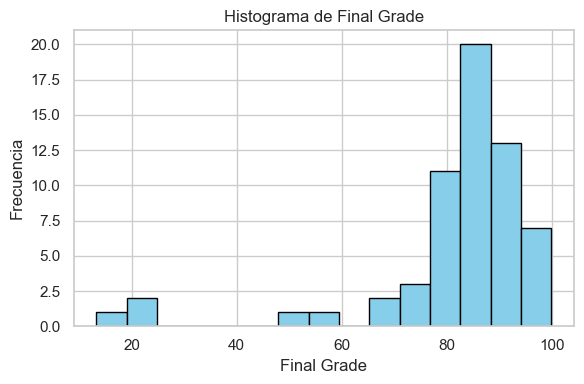

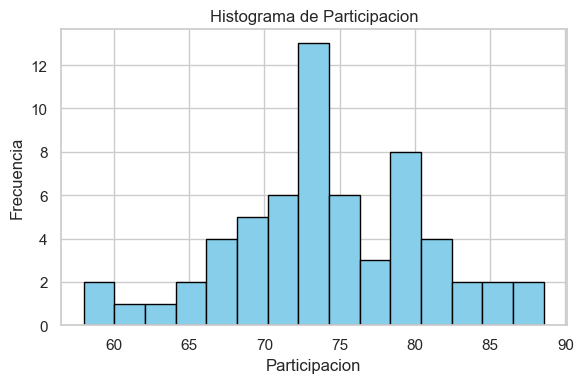

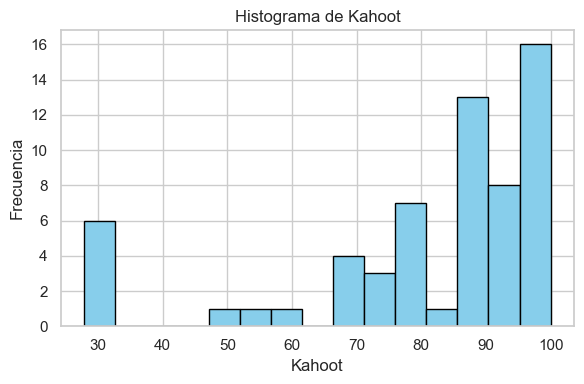

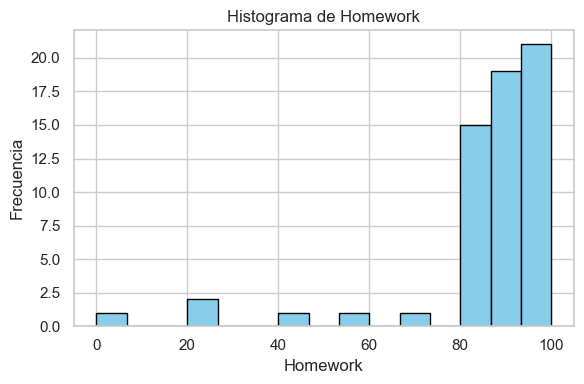

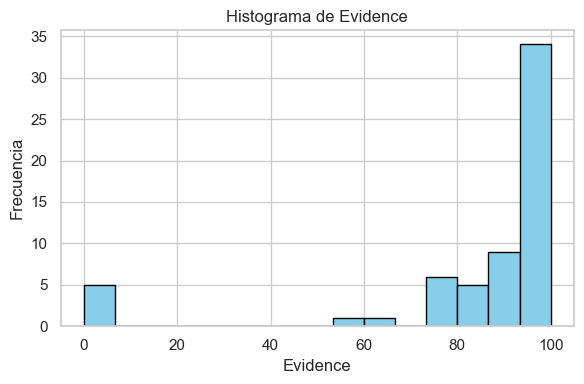

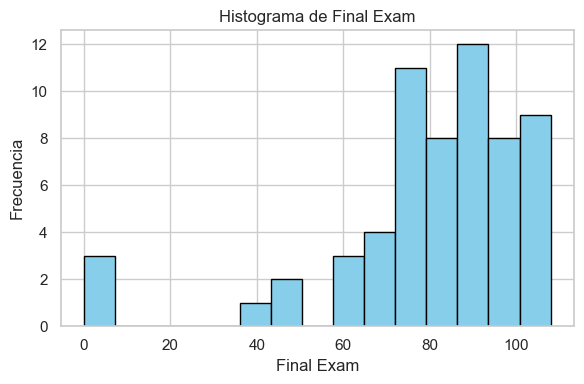

In [4]:
#Histogramas
for col in cols:
    plt.figure(figsize=(6, 4))
    plt.hist(data[col], bins=15, color='skyblue' , edgecolor='black')
    plt.title(f'Histograma de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f'histograma_{col}.png')
    plt.show()

In [5]:
# Tabla de Correlaciones
correlation_matrix = data[cols].corr(method='pearson')
correlation_matrix

,Final Grade,Participacion,Kahoot,Homework,Evidence,Final Exam
Final Grade,1.000000,0.668318,0.845145,0.858192,0.835415,0.940511
Participacion,0.668318,1.000000,0.611148,0.472772,0.505562,0.626309
Kahoot,0.845145,0.611148,1.000000,0.637111,0.701039,0.725763
Homework,0.858192,0.472772,0.637111,1.000000,0.610341,0.747572
Evidence,0.835415,0.505562,0.701039,0.610341,1.000000,0.698862
Final Exam,0.940511,0.626309,0.725763,0.747572,0.698862,1.000000


In [9]:
# Librerías necesarias
import pandas as pd
import statsmodels.api as sm
from scipy.stats import jarque_bera
from IPython.display import display

# Variable dependiente
y = data['Final Grade']

# Variables independientes
independent_vars = ['Participacion', 'Kahoot', 'Homework', 'Evidence', 'Final Exam']

# Lista para guardar resultados
resultados = []

# Generar modelos de regresión lineal simple
for var in independent_vars:
    X = sm.add_constant(data[var])  # Agrega constante (intercepto)
    modelo = sm.OLS(y, X).fit()
    
    jb_pvalor = jarque_bera(modelo.resid)[1]  # p-valor Jarque-Bera

    resultados.append({
        'Variable independiente': var,
        'Coef. estimado': round(modelo.params[var], 4),
        'Valor p': round(modelo.pvalues[var], 6),
        'R²': round(modelo.rsquared, 4),
        'R² ajustado': round(modelo.rsquared_adj, 4),
        'p-valor Jarque-Bera': round(jb_pvalor, 6)
    })

# Crear DataFrame
tabla_modelos = pd.DataFrame(resultados)

# Mostrar tabla
print("Tabla resumen de regresiones lineales simples:")
print(f"Variable Dependiente: {y}\n")
display(tabla_modelos)

Tabla resumen de regresiones lineales simples:
Variable Dependiente: 0     19.287021
1     96.101287
2     19.677646
3     89.429057
4     72.227415
        ...    
56    81.588961
57    89.804724
58    91.362994
59    56.455821
60    70.924719
Name: Final Grade, Length: 61, dtype: float64



,Variable independiente,Coef. estimado,Valor p,R²,R² ajustado,p-valor Jarque-Bera
0,Participacion,1.7533,0.0,0.4466,0.4373,0.000005
1,Kahoot,0.7119,0.0,0.7143,0.7094,0.000000
2,Homework,0.8019,0.0,0.7365,0.7320,0.000000
3,Evidence,0.5516,0.0,0.6979,0.6928,0.659247
4,Final Exam,0.6771,0.0,0.8846,0.8826,0.441392


In [5]:
X = data[['Final Exam']]

X = sm.add_constant(X)

y = data['Final Grade']

In [6]:
# Fit the model
model_no_const = sm.OLS(y, X).fit()

# Print the summary
print(model_no_const.summary())

                            OLS Regression Results                            
Dep. Variable:            Final Grade   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     452.1
Date:                Fri, 23 May 2025   Prob (F-statistic):           2.40e-29
Time:                        21:30:59   Log-Likelihood:                -193.99
No. Observations:                  61   AIC:                             392.0
Df Residuals:                      59   BIC:                             396.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         26.3729      2.695      9.787      0.0

In [7]:
X = data[['Final Exam', 'Evidence']]

X = sm.add_constant(X)

y = data['Final Grade']

In [8]:
# Fit the model
model_no_const = sm.OLS(y, X).fit()

# Print the summary
print(model_no_const.summary())

                            OLS Regression Results                            
Dep. Variable:            Final Grade   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     513.9
Date:                Fri, 23 May 2025   Prob (F-statistic):           1.27e-37
Time:                        21:31:04   Log-Likelihood:                -170.49
No. Observations:                  61   AIC:                             347.0
Df Residuals:                      58   BIC:                             353.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         21.7615      1.932     11.262      0.0

In [9]:
X = data[['Final Exam', 'Kahoot', 'Homework', 'Participacion', 'Evidence']]

X = sm.add_constant(X)

y = data['Final Grade']

In [10]:
# Fit the model
model_no_const = sm.OLS(y, X).fit()

# Print the summary
print(model_no_const.summary())

                            OLS Regression Results                            
Dep. Variable:            Final Grade   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.557e+30
Date:                Fri, 23 May 2025   Prob (F-statistic):               0.00
Time:                        21:31:13   Log-Likelihood:                 1802.5
No. Observations:                  61   AIC:                            -3593.
Df Residuals:                      55   BIC:                            -3580.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           2.22e-14   6.18e-14      0.359

In [11]:
X = data[['Final Exam', 'Participacion', 'Evidence']]

X = sm.add_constant(X)

y = data['Final Grade']

In [12]:
# Fit the model
model_no_const = sm.OLS(y, X).fit()

# Print the summary
print(model_no_const.summary())

                            OLS Regression Results                            
Dep. Variable:            Final Grade   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     374.8
Date:                Fri, 23 May 2025   Prob (F-statistic):           1.80e-37
Time:                        21:31:18   Log-Likelihood:                -167.39
No. Observations:                  61   AIC:                             342.8
Df Residuals:                      57   BIC:                             351.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             7.2536      6.155      1.178

In [13]:
X = data[['Final Exam', 'Participacion']]

X = sm.add_constant(X)

y = data['Final Grade']

In [14]:
# Fit the model
model_no_const = sm.OLS(y, X).fit()

# Print the summary
print(model_no_const.summary())

                            OLS Regression Results                            
Dep. Variable:            Final Grade   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     246.9
Date:                Fri, 23 May 2025   Prob (F-statistic):           4.23e-29
Time:                        21:31:23   Log-Likelihood:                -191.13
No. Observations:                  61   AIC:                             388.3
Df Residuals:                      58   BIC:                             394.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             5.7815      9.002      0.642

In [15]:
X = data[['Kahoot', 'Homework', 'Participacion']]

X = sm.add_constant(X)

y = data['Final Grade']

In [16]:
# Fit the model
model_no_const = sm.OLS(y, X).fit()

# Print the summary
print(model_no_const.summary())

                            OLS Regression Results                            
Dep. Variable:            Final Grade   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     180.9
Date:                Fri, 23 May 2025   Prob (F-statistic):           4.33e-29
Time:                        21:31:27   Log-Likelihood:                -188.07
No. Observations:                  61   AIC:                             384.1
Df Residuals:                      57   BIC:                             392.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -21.7077      8.436     -2.573

In [5]:
#!pip install imbalanced-learn

In [19]:
# Create a new column 'Passes' using a for loop with if-else logic
passes = []
for grade in data['Final Grade']:
#Are you sure?-vv
    if grade > 85:
        passes.append('Passes')
    else:
        passes.append('Losses')

data['Passes'] = passes
data

,Matricula,Gender,Final Grade,Participacion,Kahoot,Homework,Evidence,Final Exam,Section,Passes
0,A00571984,Female,19.287021,60.500001,30.580137,22.500000,0,0.0,201,Losses
1,A01784463,Male,96.101287,73.750001,98.591914,95.000000,94,108.0,201,Passes
2,A01275304,Male,19.677646,58.937501,30.580137,25.000000,0,0.0,201,Losses
3,A01784307,Male,89.429057,74.687501,95.006214,97.500000,94,85.0,201,Passes
4,A01661905,Male,72.227415,71.437501,57.411935,82.000000,94,61.0,201,Losses
...,...,...,...,...,...,...,...,...,...,...
56,A01784574,Female,81.588961,72.567022,86.276052,91.250000,75,79.0,202,Losses
57,A01784046,Female,89.804724,81.367089,90.247739,91.250000,75,100.0,202,Passes
58,A01784111,Female,91.362994,79.170807,87.701534,88.928571,94,100.0,202,Passes
59,A01746739,Male,56.455821,66.930390,27.860799,91.428571,0,64.6,202,Losses


In [20]:
# Convert 'Gender' to numeric: 'Male' as 1, 'female' as 0
data['PassesNumeric'] = np.where(data['Passes'] == 'Passes', 1, 0)
data

,Matricula,Gender,Final Grade,Participacion,Kahoot,Homework,Evidence,Final Exam,Section,Passes,PassesNumeric
0,A00571984,Female,19.287021,60.500001,30.580137,22.500000,0,0.0,201,Losses,0
1,A01784463,Male,96.101287,73.750001,98.591914,95.000000,94,108.0,201,Passes,1
2,A01275304,Male,19.677646,58.937501,30.580137,25.000000,0,0.0,201,Losses,0
3,A01784307,Male,89.429057,74.687501,95.006214,97.500000,94,85.0,201,Passes,1
4,A01661905,Male,72.227415,71.437501,57.411935,82.000000,94,61.0,201,Losses,0
...,...,...,...,...,...,...,...,...,...,...,...
56,A01784574,Female,81.588961,72.567022,86.276052,91.250000,75,79.0,202,Losses,0
57,A01784046,Female,89.804724,81.367089,90.247739,91.250000,75,100.0,202,Passes,1
58,A01784111,Female,91.362994,79.170807,87.701534,88.928571,94,100.0,202,Passes,1
59,A01746739,Male,56.455821,66.930390,27.860799,91.428571,0,64.6,202,Losses,0


In [21]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Cargar datos (ya los tienes en tu variable data)
X = data[['Final Exam']]
y = data['PassesNumeric']

# Aplicar SMOTE para balancear clases
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Agregar constante para el modelo logit
X_resampled_const = sm.add_constant(X_resampled)

# Ajustar modelo logit con datos balanceados
logit_model = sm.Logit(y_resampled, X_resampled_const).fit()

# Imprimir resumen
print(logit_model.summary())
print

Optimization terminated successfully.
         Current function value: 0.321058
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:          PassesNumeric   No. Observations:                   62
Model:                          Logit   Df Residuals:                       60
Method:                           MLE   Df Model:                            1
Date:                Fri, 23 May 2025   Pseudo R-squ.:                  0.5368
Time:                        21:32:42   Log-Likelihood:                -19.906
converged:                       True   LL-Null:                       -42.975
Covariance Type:            nonrobust   LLR p-value:                 1.102e-11
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -18.9490      5.146     -3.683      0.000     -29.034      -8.864
Final Exam     0.2233      0.

<function print(*args, sep=' ', end='\n', file=None, flush=False)>

In [24]:
# Make predictions
predicted_probabilities = logit_model.predict(X)
predicted_probabilities

0     5.895980e-09
1     9.943047e-01
2     5.895980e-09
3     5.068914e-01
4     4.818219e-03
          ...     
56    2.121599e-01
57    9.669579e-01
58    9.669579e-01
59    1.069943e-02
60    5.180466e-01
Length: 61, dtype: float64

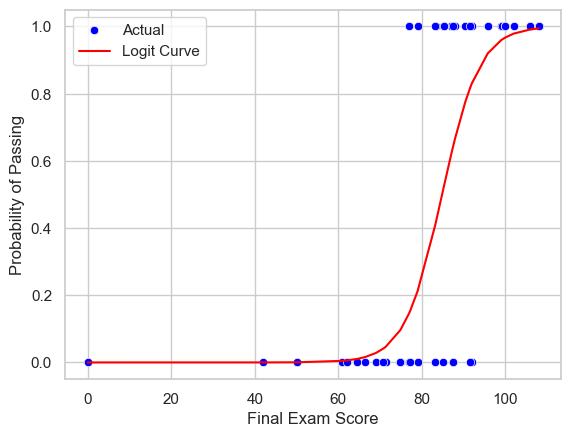

In [25]:
sns.scatterplot(x=data['Final Exam'], y=y, color='blue', label='Actual')

sns.lineplot(x=data['Final Exam'], y=predicted_probabilities, color='red', label='Logit Curve')

plt.xlabel('Final Exam Score')
plt.ylabel('Probability of Passing')

plt.legend()
plt.show()